# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv('../datasets/ionosphere_data.csv')
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


# Analyzing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

### Importing modules for encoding purposes

In [4]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df.label = le.fit_transform(df.label) # It will transform the data
# df.label = to_categorical(df.label)

In [6]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [7]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting Data

In [8]:
X = df.iloc[:,:-1].values #Features
y = df.iloc[:,-1:].values #Target

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, train_size=0.6)

# Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [11]:
X_train.shape

(210, 34)

In [12]:
model = Sequential([Dense(16, input_shape=(34,), activation='relu'),
                    Dense(1, activation='sigmoid')])

# Compile

In [13]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
class myCallback(tf.keras.callbacks.Callback):
  '''Callback function to check accuracy is greatere than 92 and stop if the accuracy reaches above 92% '''
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.92):
      print("\nReached 92% accuracy or more so cancelling training!")
      self.model.stop_training = True

In [15]:
callback = myCallback()  # Making object of callback function

In [16]:
history = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 0s 665us/step - loss: 0.6514 - accuracy: 0.6185
Epoch 2/100
7/7 [==============================] - 0s 499us/step - loss: 0.6485 - accuracy: 0.6109
Epoch 3/100
7/7 [==============================] - 0s 665us/step - loss: 0.6303 - accuracy: 0.6317
Epoch 4/100
7/7 [==============================] - 0s 665us/step - loss: 0.5978 - accuracy: 0.6751
Epoch 5/100
7/7 [==============================] - 0s 499us/step - loss: 0.5729 - accuracy: 0.7133
Epoch 6/100
7/7 [==============================] - 0s 498us/step - loss: 0.5649 - accuracy: 0.7172
Epoch 7/100
7/7 [==============================] - 0s 665us/step - loss: 0.5649 - accuracy: 0.7154
Epoch 8/100
7/7 [==============================] - 0s 499us/step - loss: 0.5476 - accuracy: 0.7312
Epoch 9/100
7/7 [==============================] - 0s 831us/step - loss: 0.5414 - accuracy: 0.7343
Epoch 10/100
7/7 [==============================] - 0s 665us/step - loss: 0.5391 - accuracy: 0.7343
Epoch 11/

# Evaluation

In [17]:
evaluation = model.evaluate(X_test,y_test)
evaluation

5/5 [==============================] - 0s 749us/step - loss: 0.2385 - accuracy: 0.9149


[0.23849700391292572, 0.914893627166748]

In [18]:
loss,accuracy = evaluation

In [19]:
pd.DataFrame([{'Loss':loss*100,'Accuracy':accuracy*100}])

,Loss,Accuracy
0,23.8497,91.489363


<AxesSubplot:>

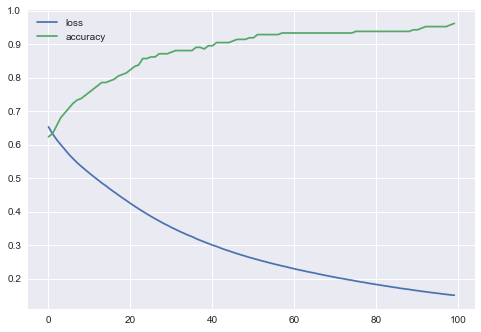

In [20]:
plt.style.use('seaborn')
pd.DataFrame(history.history)[['loss','accuracy']].plot()

# Prediction

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred = np.round(y_pred).astype(int)

In [23]:
print("0 represents = {}\
    \n1 represents = {}".format(le.inverse_transform([0]), le.inverse_transform([1])))

0 represents = ['b']    
1 represents = ['g']


In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9148936170212766

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test, y_pred)

array([[39, 11],
       [ 1, 90]], dtype=int64)

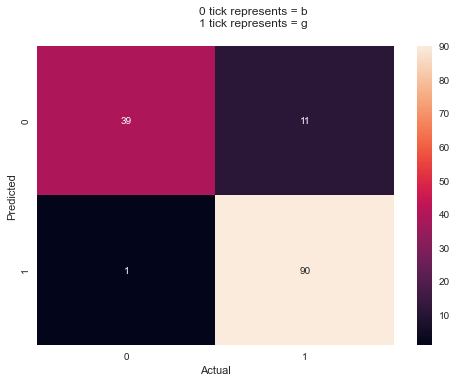

In [27]:
plt.style.use('seaborn')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.suptitle("0 tick represents = {}\n\
1 tick represents = {}".format(''.join(le.inverse_transform([0])), ''.join(le.inverse_transform([1]))))
plt.show()

In [28]:
print("Total no. of Good in test set = {}\
    \nTotal no. of Bad in test set = {}".format((y_test==1).sum(),(y_test==0).sum())) 

Total no. of Good in test set = 91    
Total no. of Bad in test set = 50


In [29]:
print("Percentage of Good in test set = {}%\
    \nPercentage of Bad in test set = {}%".format(((y_test==1).sum()/len(y_test) )*100,((y_test==0).sum()/len(y_test) )*100)) 



Percentage of Good in test set = 64.53900709219859%    
Percentage of Bad in test set = 35.46099290780142%


In [30]:
print("Total no. of Good in prediction  = {}\
    \nTotal no. of Bad in prediction = {}".format((y_pred==1).sum(),(y_pred==0).sum())) 

Total no. of Good in prediction  = 101    
Total no. of Bad in prediction = 40


In [31]:
print("Percentage of Good in prediction = {}%\
    \nPercentage of Bad in prediction = {}%".format(((y_pred==1).sum()/len(y_pred) )*100,((y_pred==0).sum()/len(y_pred) )*100)) 



Percentage of Good in prediction = 71.63120567375887%    
Percentage of Bad in prediction = 28.368794326241137%


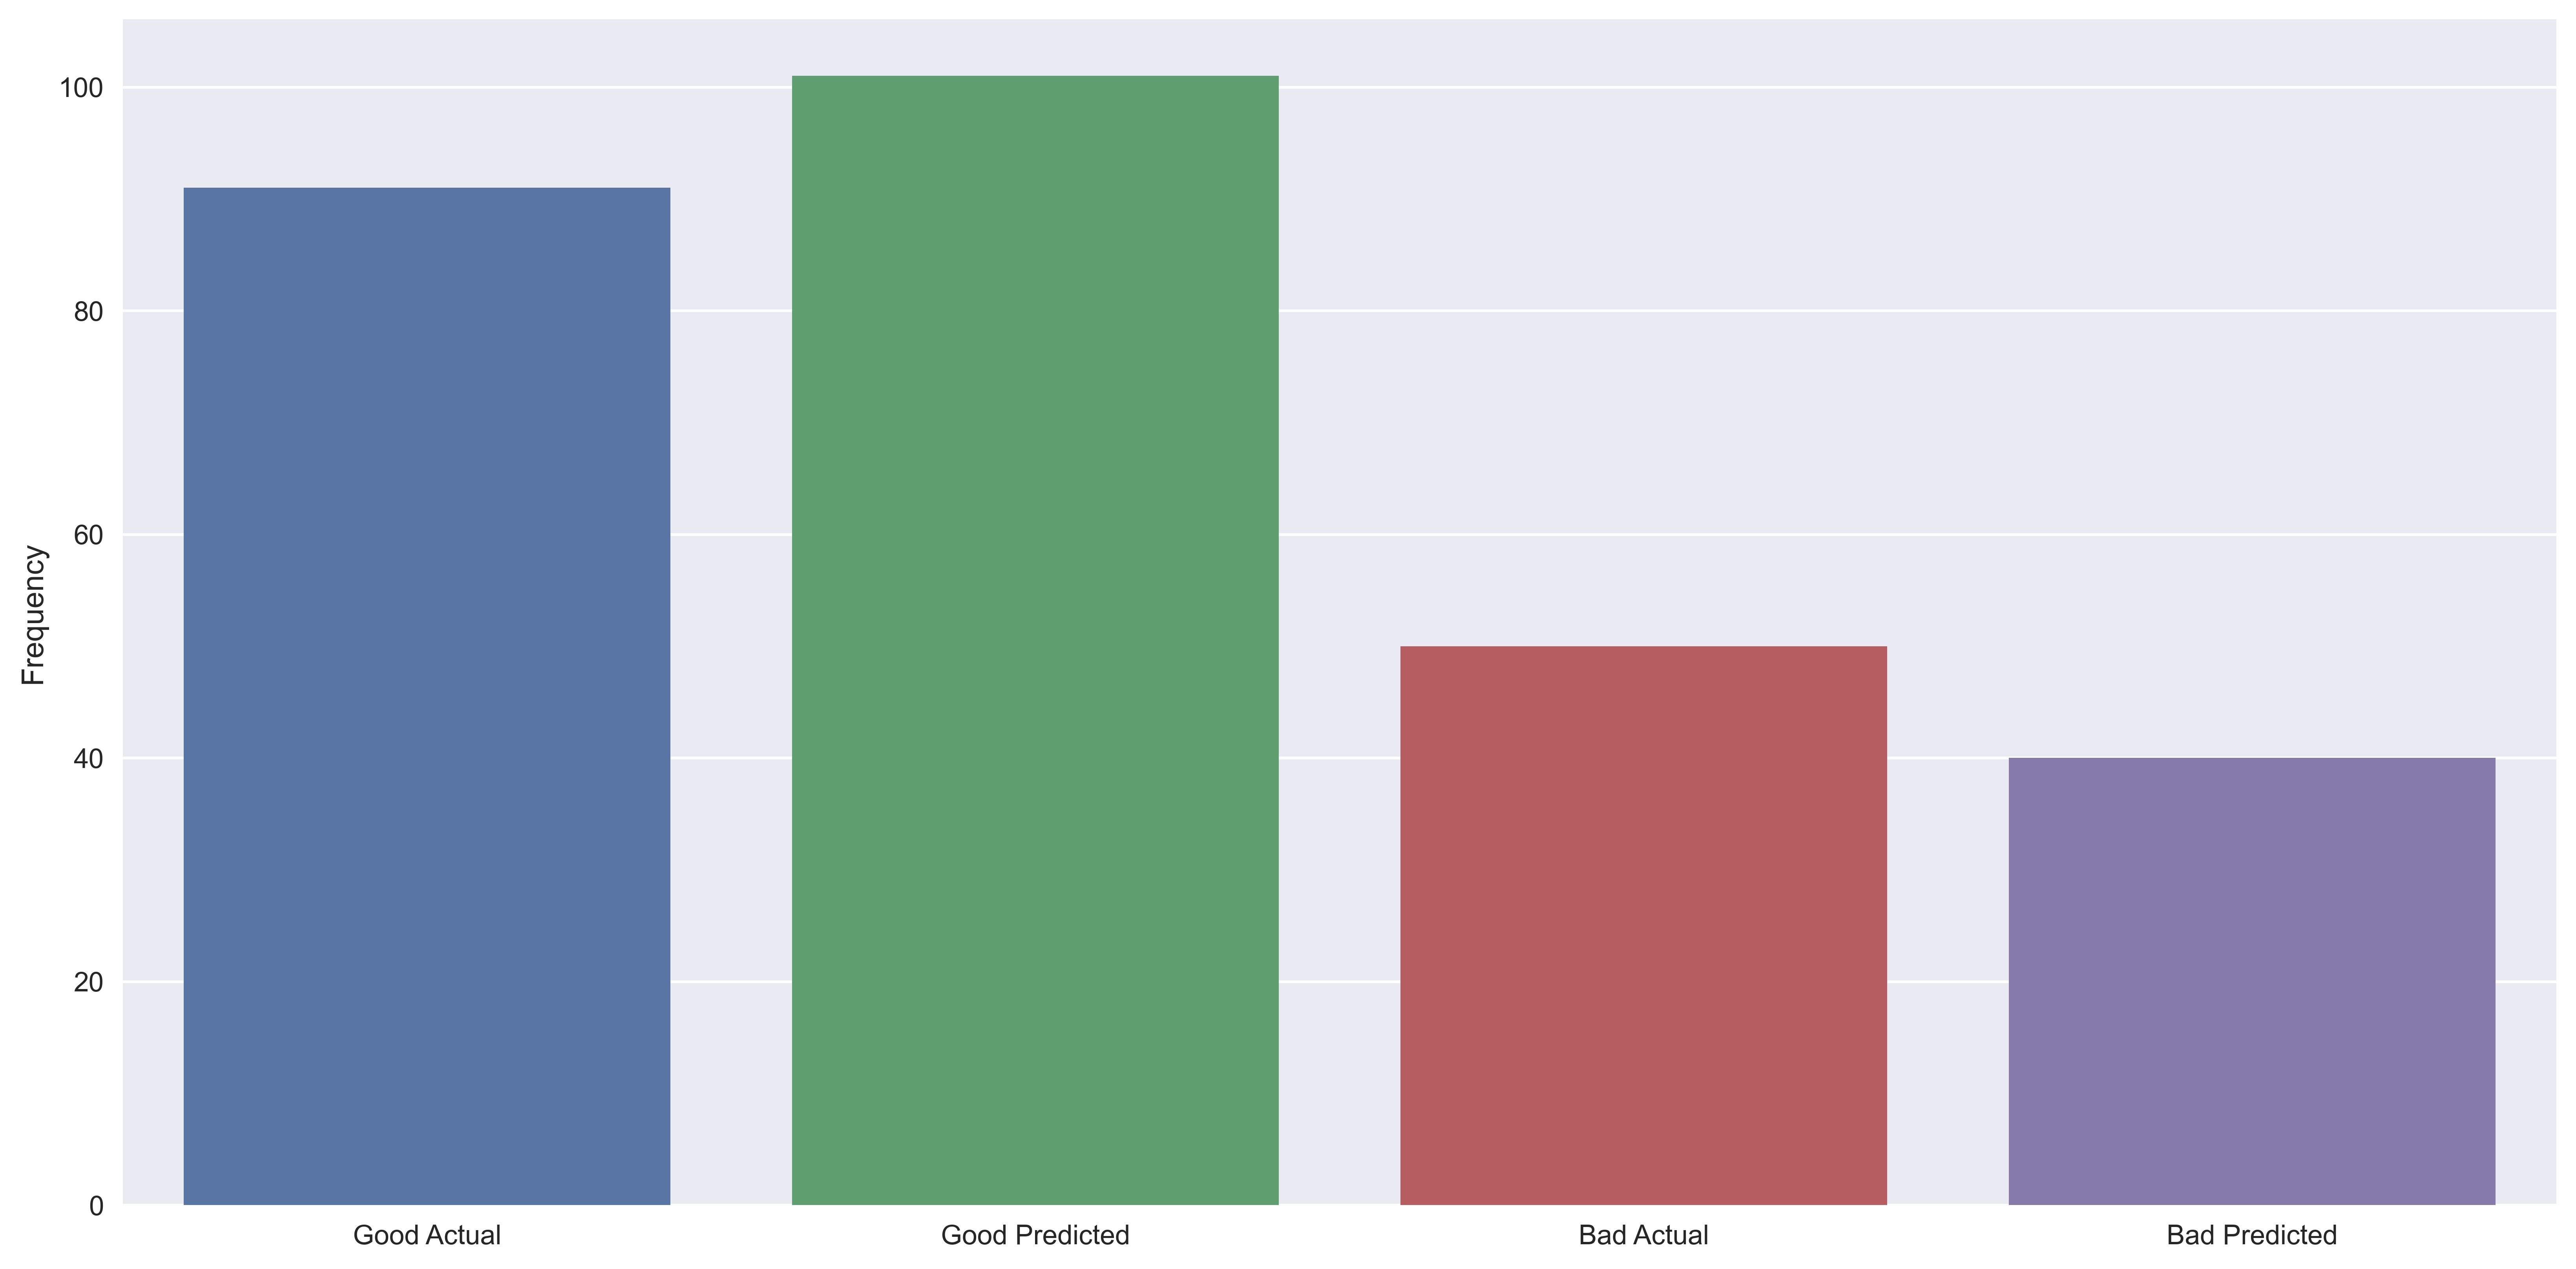

In [32]:
plt.figure(figsize=(16,8), dpi =500)
sns.barplot(data=pd.DataFrame([{'Good Actual':(y_test==1).sum(), 'Good Predicted':(y_pred==1).sum(),'Bad Actual':(y_test==0).sum(), 'Bad Predicted':(y_pred==0).sum()}]))
plt.ylabel('Frequency')
plt.show()

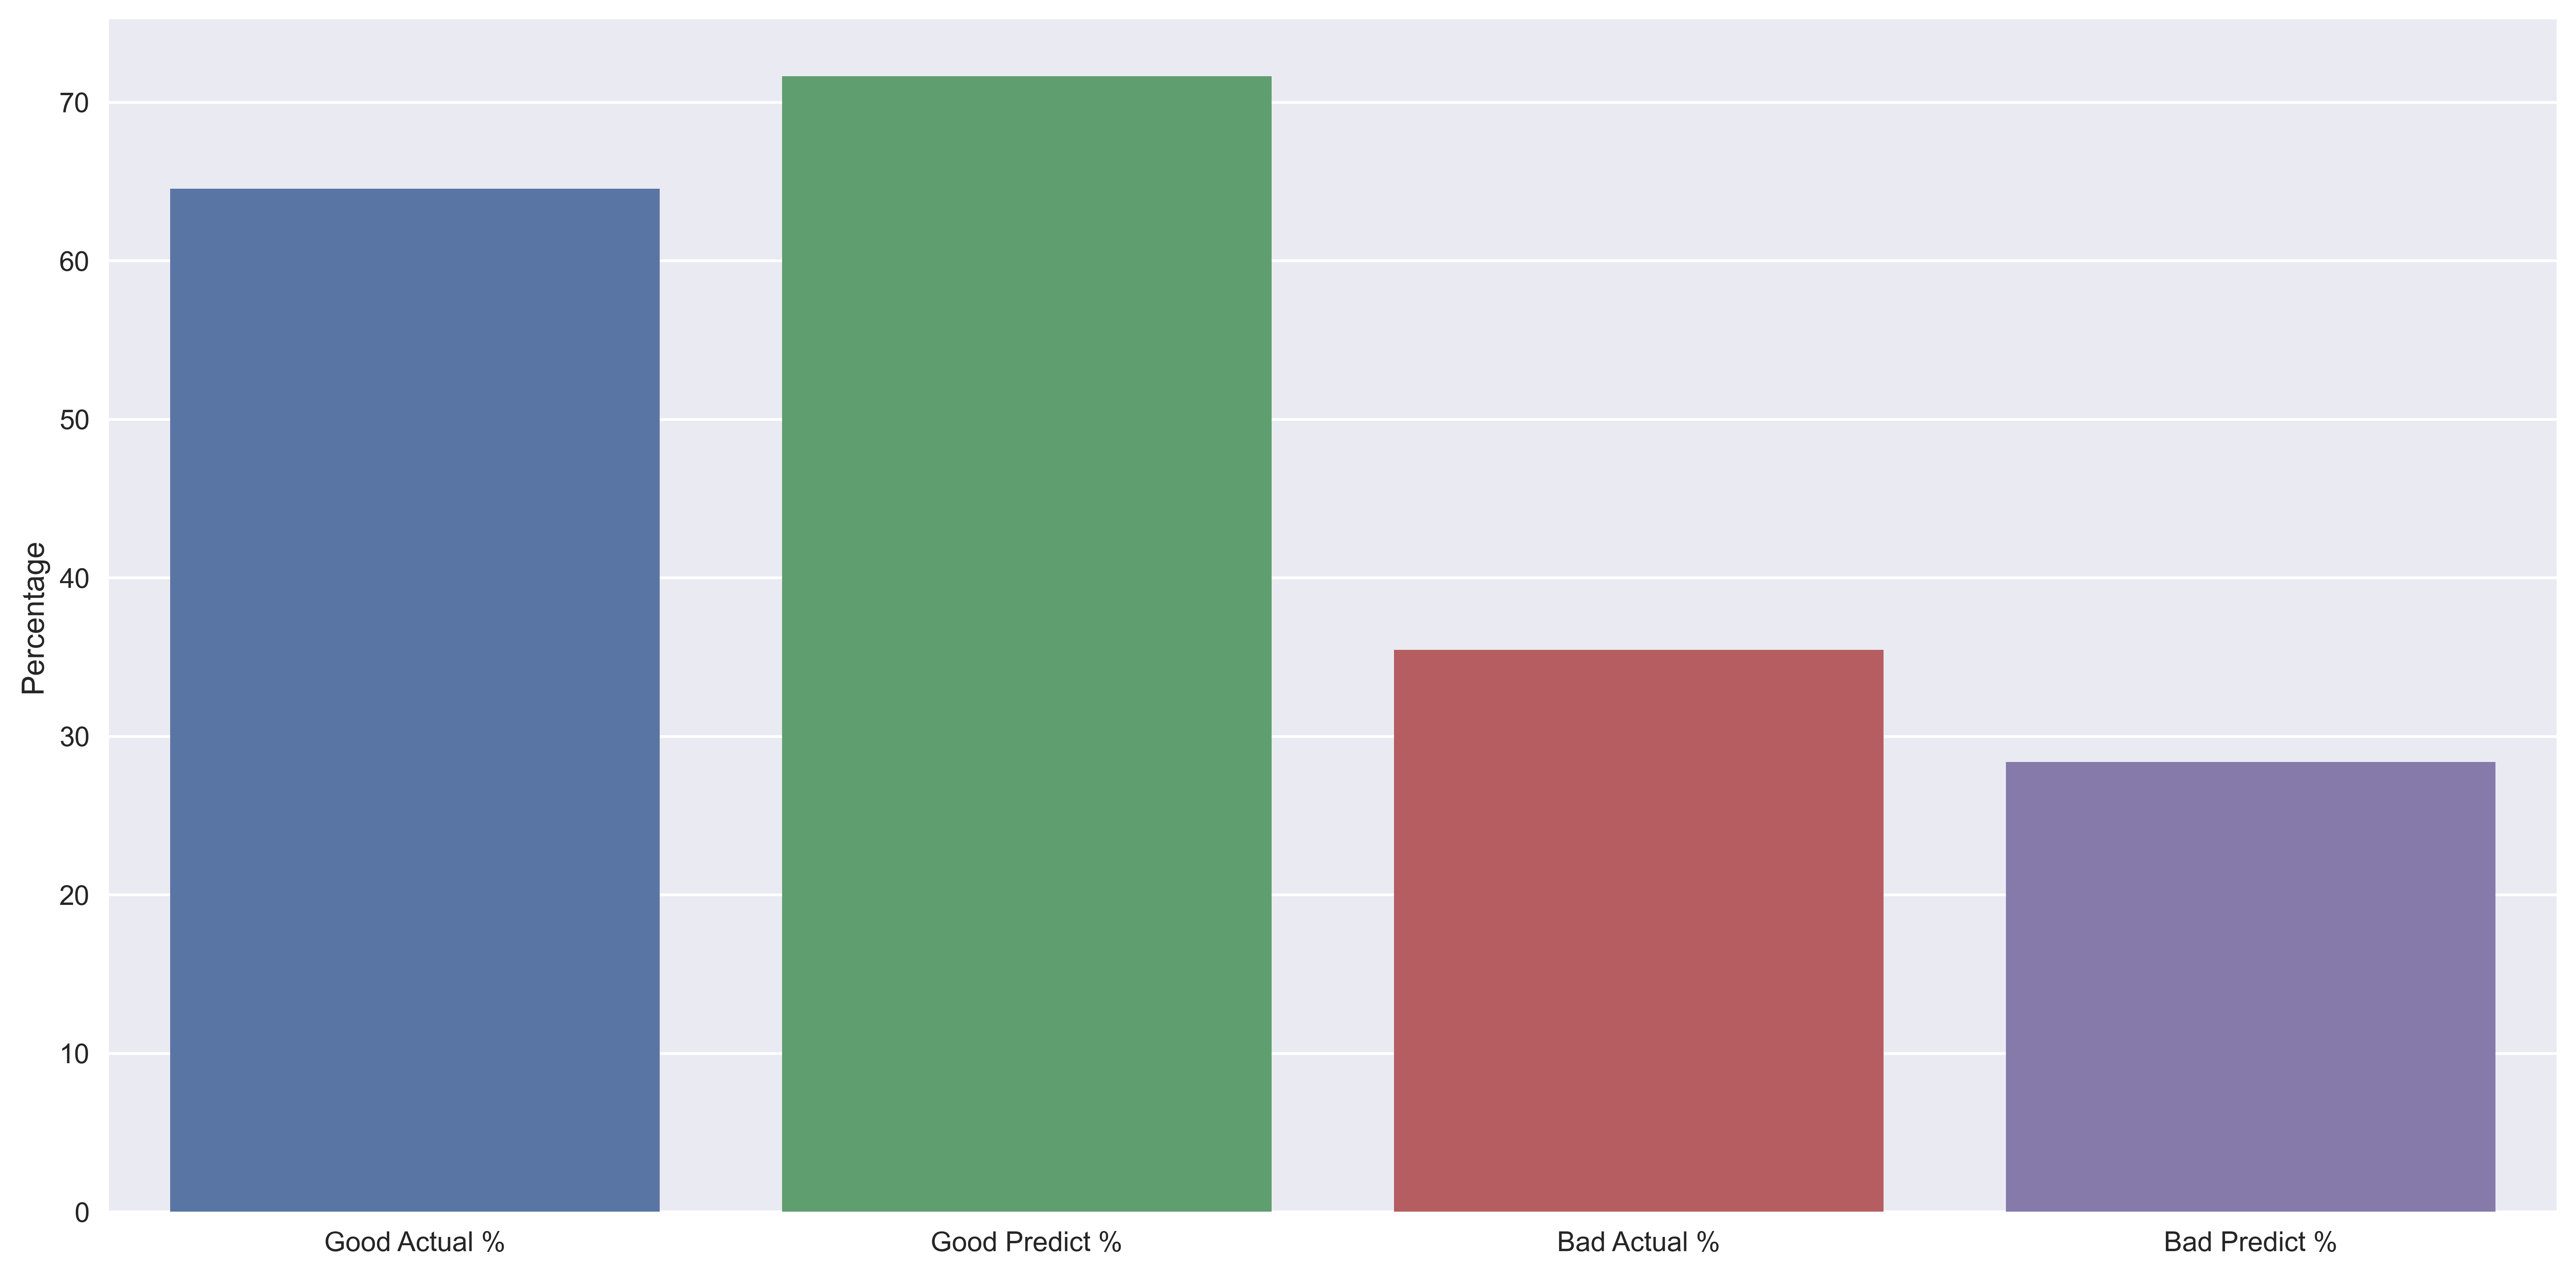

In [33]:
plt.figure(figsize=(16,8), dpi =500)
sns.barplot(data=pd.DataFrame([{'Good Actual %':((y_test==1).sum()/len(y_test))*100, 'Good Predict %':((y_pred==1).sum()/len(y_pred))*100,'Bad Actual %':((y_test==0).sum()/len(y_test) )*100, 'Bad Predict %':((y_pred==0).sum()/len(y_pred))*100}]))
plt.ylabel('Percentage')
plt.show()